
# House Prices - Advanced Regression Techniques

Authors:
- Rayan BEN TALEB
- Jorge GOMEZ-BRAVO
- Emilio MONROY
- Guilhem VERMOREL





## Exploratory analysis

In [ ]:
#import
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


#read data
trainset = pd.read_csv('/content/train.csv', delimiter=',')
testset_X = pd.read_csv('/content/test.csv', delimiter=',')
testset_y = pd.read_csv('/content/sample_submission.csv', delimiter=',')

In [ ]:
print(trainset.shape)
print(trainset.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

To begin, we just look at the size of our dataset, 1460 raws for 81 columns. It's a big dataset for this kind of project.

It seems that some columns contain missing information, and we face many different type of Data (Float, Int, String)


All this suggests that we will need a data prepocessing step, before beginning the project

But we can always try to discover some iterestings information by doing an explonatory analysis 

In [ ]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


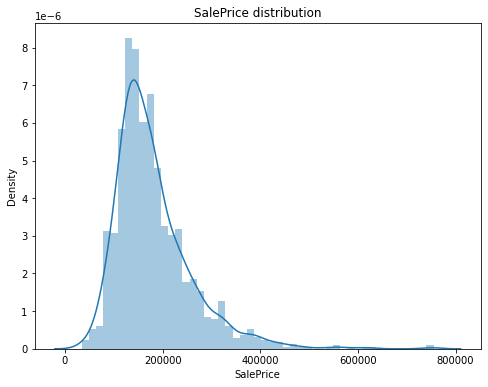

In [ ]:
plt.figure(1, figsize=(8,6))
sns.distplot(trainset['SalePrice'])
plt.title('SalePrice distribution')
plt.show()

We begin buy looking at the Sale price distribution, this is like a classic first step to be sure that the distribution isn't unbalanced. In fact, all our regressions models will be biased if the data are unbalaced. We see that our dataset cover Sale price from 200000 to 800000 but almost all our samples are inferior to 400000 and the majority are even inferior to 200000, that mean that we need to rebalance our dataset to correct that problem

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


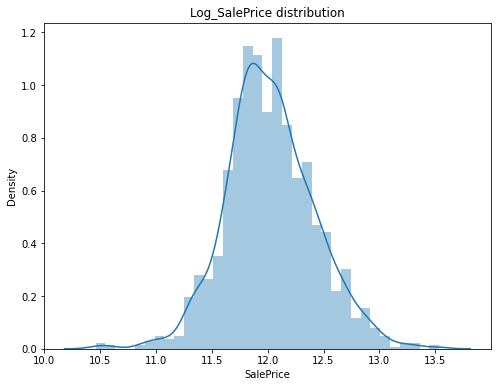

In [ ]:
plt.figure(2, figsize=(8,6))
log_SalePrice = np.log1p(trainset['SalePrice'])
plt.title('Log_SalePrice distribution')
sns.distplot(log_SalePrice)

For example, we can rebalance our data by using applying logarithm to them. 

Next step, lets look at corrélation between our columns 

<Figure size 720x720 with 0 Axes>

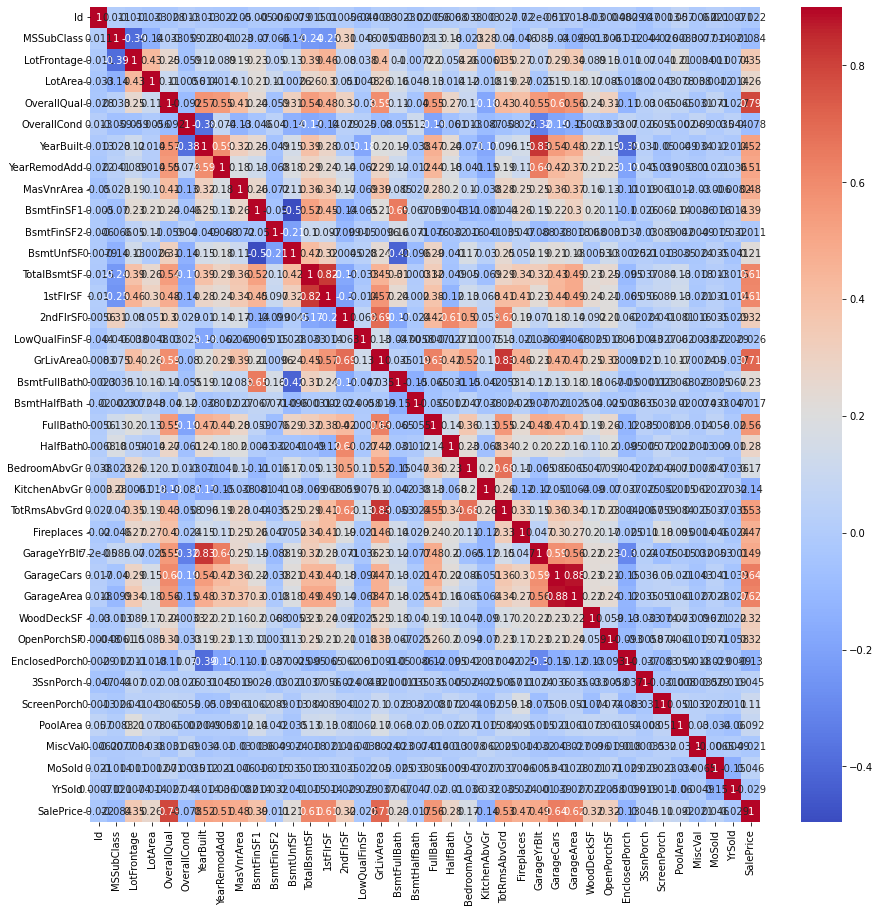

In [ ]:
# Correlation 
plt.figure(3,figsize=(10, 10))
corr_matrix = trainset.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, cmap="coolwarm")
plt.show()

We have to much columns to be able to read anything let's print only the most correlated columns 

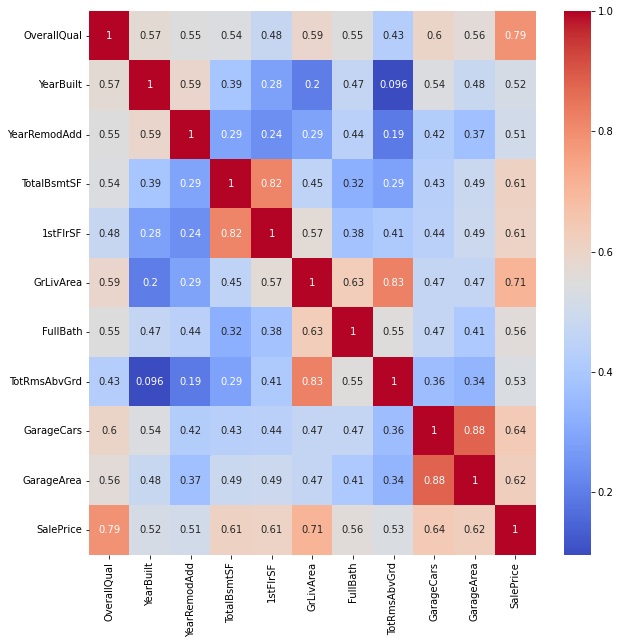

In [ ]:

corr_matrix = trainset.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(trainset[top_corr_features].corr(),annot=True,cmap="coolwarm")
plt.show()

We see that we have many columns wich are highly correlated to others ones, that could mean that this columns represent the same informations for example for the case of GarageArea and GarageCars, it is normal to find a high correlation beacause the size of the garage is directly correlated to the number of place for cars. We need to be very carefull to this kind of correlation because they could biased our models

In [ ]:
print("features highly correlated with the target")

corr_matrix = trainset.corr()

#Sort in ascending order
corr_matrix["SalePrice"].sort_values(axis=0, ascending=False)

features highly correlated with the target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

A very interresting other thing to do is to see the most correlated column to SalePrice because they will contain the most important information to predict 

We could focus on positive and negative correlation, for now we will restrain us to the positive correlation 

So according to our work just before these are the most correlated columns to the sale price:


1.   OverallQual: Rates the overall material and finish of the house
2.   GrLivArea: Above grade (ground) living area square feet
3.   GarageCars: Size of garage in car capacity
4.   TotalBsmtSF: Total square feet of basement area
5.   1stFlrSF: First Floor square feet 

It's not very surprising that Sale price is very correlated to the quality of the house or the total feet of basement area 



Let's see now how this correlation appears on graphs 

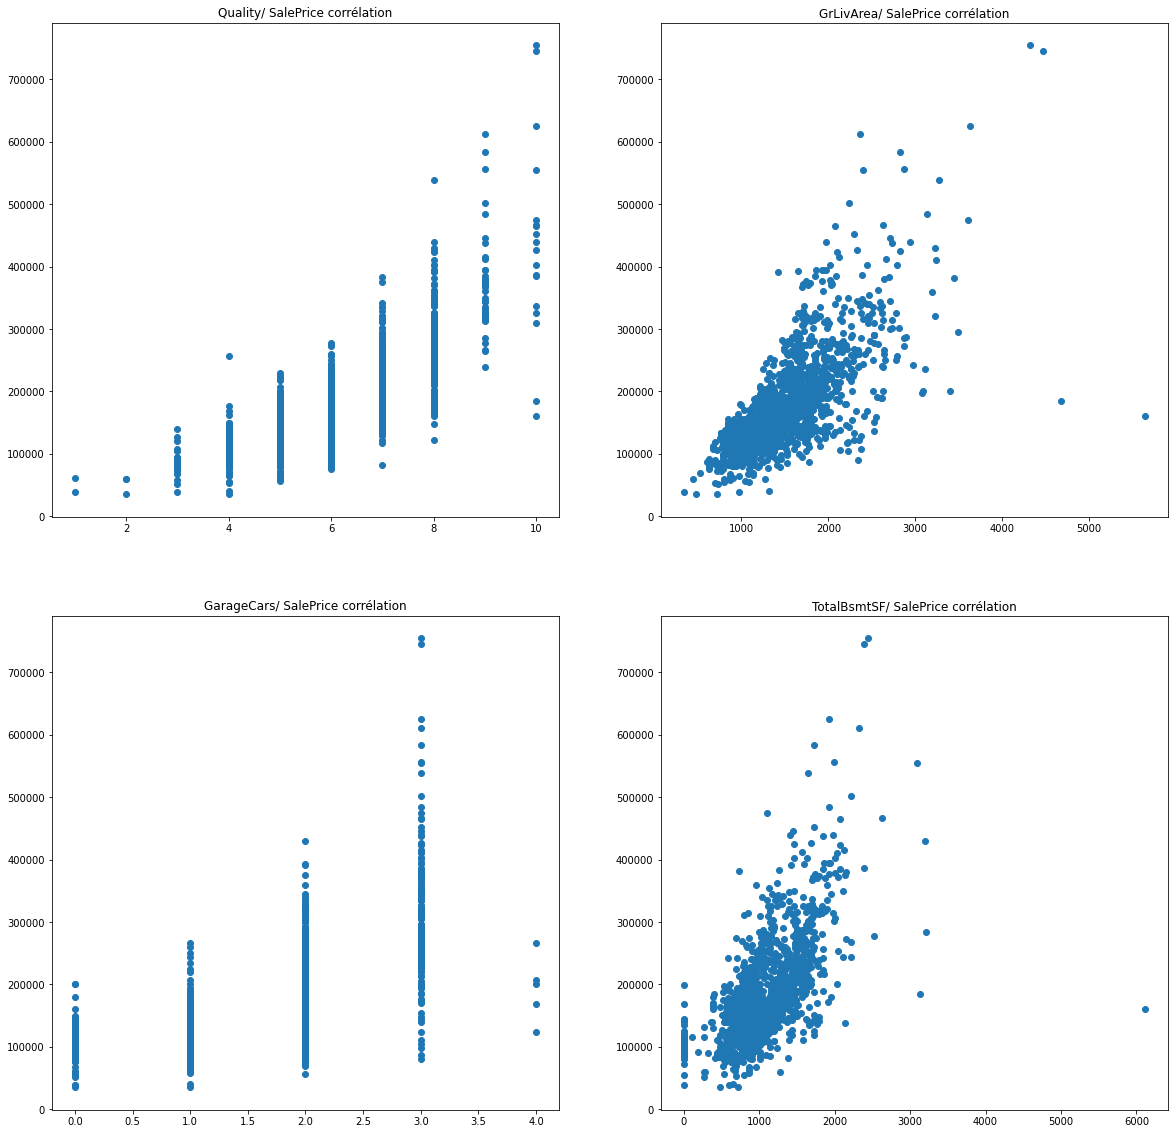

In [ ]:
plt.figure(4,figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.scatter(trainset['OverallQual'],trainset['SalePrice'],) 
plt.title("Quality/ SalePrice corrélation") 

plt.subplot(2, 2, 2)
plt.scatter(trainset['GrLivArea'],trainset['SalePrice'],) 
plt.title("GrLivArea/ SalePrice corrélation") 

plt.subplot(2, 2, 3)
plt.scatter(trainset['GarageCars'],trainset['SalePrice'],) 
plt.title("GarageCars/ SalePrice corrélation") 

plt.subplot(2, 2, 4)
plt.scatter(trainset['TotalBsmtSF'],trainset['SalePrice'],) 
plt.title("TotalBsmtSF/ SalePrice corrélation") 

plt.show()

It's very interresting to look at these graphs. In most of them, we see that Sale price is directly correlated to the columns studied, but it's still impossible to use only them to try to find the sale price. The correlations aren't good anothe to restrain the study to only these five columns most of the information is still in other part of the dataset.

For example, in the case of Over All Quality we see always very  large dispertion, for the same quality some times the price is going to be multiply by 6

## Data Preprocessing


### Open data

To begin, after downloading trainset and testset on google drive, we can open a dataframe with the read_csv function. In order to select data only, we drop the ID column and split the trainset into input variables and labels. 


In [ ]:
import pandas as pd
#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")

#select data
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)

print('trainset_X : \n', trainset_X)
print('trainset_y : \n',trainset_y)
print('testset_X : \n',testset_X)

trainset_X : 
       MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  

### Do One-Hot-Encoding, first version : integer values

One-Hot-Encoding method is a good way to transform categorial values into numerical one. Our first version is to transform this categorial values into integer values. Indeed, we can select for each string a corresponding integer. After selecting columns constitued of categorial values only, we can apply the codes function on values. Although, this method create a hierarchie on data, it get the best results. 

In [ ]:
#one-hot-encoding integer version 
trainset_X_integer_encoding = trainset_X.copy()
testset_X_integer_encoding = testset_X.copy()

columns = []
for var in trainset_X_integer_encoding.columns:
  for e in trainset_X_integer_encoding[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X_integer_encoding = trainset_X_integer_encoding.astype({str(var):'category'})
      testset_X_integer_encoding = testset_X_integer_encoding.astype({str(var):'category'})
      break


trainset_X_integer_encoding[columns] = trainset_X_integer_encoding[columns].apply(lambda x: x.cat.codes)
testset_X_integer_encoding[columns] = testset_X_integer_encoding[columns].apply(lambda x: x.cat.codes)

print('trainset_X_integer_encoding : \n',trainset_X_integer_encoding)
print('testset_X_integer_encoding : \n',testset_X_integer_encoding)

trainset_X_numerical_encoding : 
       MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1     -1         3   
1             20         3         80.0     9600       1     -1         3   
2             60         3         68.0    11250       1     -1         0   
3             70         3         60.0     9550       1     -1         0   
4             60         3         84.0    14260       1     -1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1     -1         3   
1456          20         3         85.0    13175       1     -1         3   
1457          70         3         66.0     9042       1     -1         3   
1458          20         3         68.0     9717       1     -1         3   
1459          20         3         75.0     9937       1     -1         3   

      LandContour  Utilities  LotConfig  

### Do One-Hot-Encoding, second version : binary values

Our second version is to transform this categorial values into binary values. Indeed, for each categorial variables, we create x new columns in the dataset for x categorial values, and we drop the original column. Thus, after selecting columns constitued of categorial values only, we can apply the get_dummies function on values. 

In [ ]:
#one-hot-encoding binary version
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      break

trainset_X_binary_encoding = pd.get_dummies(trainset_X,prefix=columns)   
testset_X_binary_encoding = pd.get_dummies(testset_X,prefix=columns)    

print('trainset_X_binary_encoding : \n',trainset_X_binary_encoding)
print('testset_X_binary_encoding : \n',testset_X_binary_encoding)

trainset_X_binary_encoding : 
       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  

### Do One-Hot-Encoding, third version : categories of continuous values and binary values

Our third version is to split continuous values into an x number of categorial values. So, the whole dataset is now composed of categorial values and can be transform into binary values. Thus, we can apply the get_dummies function on values. 

In [ ]:
#create categories with continuous values
columns_cut = [trainset_X.columns[i] for i in range(len(trainset_X.columns))]
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns_cut.remove(str(var))  #columns of float or integers
      break

trainset_X_categorical_values = pd.DataFrame()
testset_X_categorical_values = testset_X.copy()
for var in columns_cut:
  values_train,cat_train = pd.cut(trainset_X[str(var)],5,labels=['a','b','c','d','e'],retbins=True)
  npvalues_train = np.array(values_train)
  for i in range(len(npvalues_train)):
    if npvalues_train[i] == 'a':
      npvalues_train[i] = 'inf'+str(cat_train[1])
    if npvalues_train[i] == 'b':
      npvalues_train[i] = 'betw'+str(cat_train[1])+'and'+str(cat_train[2])
    if npvalues_train[i] == 'c':
      npvalues_train[i] = 'betw'+str(cat_train[2])+'and'+str(cat_train[3])
    if npvalues_train[i] == 'd':
      npvalues_train[i] = 'betw'+str(cat_train[3])+'and'+str(cat_train[4])
    if npvalues_train[i] == 'f':
      npvalues_train[i] = 'sup'+str(cat_train[4])
  trainset_X_categorical_values[str(var)]=npvalues_train



  for i in range(len(testset_X[str(var)])):
    if testset_X_categorical_values[str(var)][i:i+1].values < cat_train[1]:
      testset_X_categorical_values[str(var)][i:i+1] = 'inf'+str(cat_train[1])
    elif testset_X_categorical_values[str(var)][i:i+1].values < cat_train[2]:
      testset_X_categorical_values[str(var)][i:i+1] = 'betw'+str(cat_train[1])+'and'+str(cat_train[2])
    elif testset_X_categorical_values[str(var)][i:i+1].values < cat_train[3]:
      testset_X_categorical_values[str(var)][i:i+1] = 'betw'+str(cat_train[2])+'and'+str(cat_train[3])
    elif testset_X_categorical_values[str(var)][i:i+1].values < cat_train[4]:
      testset_X_categorical_values[str(var)][i:i+1] = 'betw'+str(cat_train[3])+'and'+str(cat_train[4])
    else :
      testset_X_categorical_values[str(var)][i:i+1] = 'sup'+str(cat_train[4])


#one-hot-encoding binary version 
trainset_X_categorical_values = pd.get_dummies(trainset_X_categorical_values,prefix=trainset_X_categorical_values.columns)   
testset_X_categorical_values = pd.get_dummies(testset_X_categorical_values,prefix=testset_X_categorical_values.columns)

print('trainset_X_categorical_values : \n',trainset_X_categorical_values)
print('testset_X_categorical_values : \n',testset_X_categorical_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to b

trainset_X_categorical_values : 
       MSSubClass_betw54.0and88.0  MSSubClass_betw88.0and122.0  MSSubClass_e  \
0                              1                            0             0   
1                              0                            0             0   
2                              1                            0             0   
3                              1                            0             0   
4                              1                            0             0   
...                          ...                          ...           ...   
1455                           1                            0             0   
1456                           0                            0             0   
1457                           1                            0             0   
1458                           0                            0             0   
1459                           0                            0             0   

      MSSubClass_

### Add columns of testset unseen values 

After doing one-hot binary encoding on testset, we have remarked that the number of trainset columns and the one of testset columns are no longer the same. The reason is because some categorial values are seen in the trainset but not in the testset. So, we add this columns, present only in the trainset, in the testset with a 0 for all values. Thus, we get the same number of columns in the both sets. 

In [ ]:
#add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X_binary_encoding.columns)
test_columns = np.array(testset_X_binary_encoding.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X_binary_encoding[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X_binary_encoding[train_columns[0]])))


print('trainset_X length : ',len(trainset_X_binary_encoding.columns))
print('testset_X length before preprocessing : ',len(testset_X_binary_encoding.columns))
print('testset_X length after preprocessing : ',len(new_testset_X.columns))

testset_X_binary_encoding = new_testset_X

trainset_X length :  288
testset_X length before preprocessing :  270
testset_X length after preprocessing :  288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


### Change nan values 

Some columns still contain nan values, and to delete it without delete all the row (because we would lose information and we have to keep the same number of testset row to put it on kaggle), we have change them into the mean of all values of the corresponding columns. It is possible to change it into the median or just a 0, but we generally get best results with the mean. 

In [ ]:
#change nan values into column's mean

testset_X_nan_into_mean = testset_X_binary_encoding.fillna(testset_X_binary_encoding.mean())
trainset_X_nan_into_mean = trainset_X_binary_encoding.fillna(trainset_X_binary_encoding.mean())
trainset_y_nan_into_mean = trainset_y.fillna(trainset_y.mean())

print('Number of nan values in the trainset before preprocessing : ',trainset_X_binary_encoding.isna().sum().sum())
print('Number of nan values in the testset before preprocessing : ',testset_X_binary_encoding.isna().sum().sum())
print('Number of nan values in the trainset after preprocessing : ',trainset_X_nan_into_mean.isna().sum().sum())
print('Number of nan values in the testset after preprocessing : ',testset_X_nan_into_mean.isna().sum().sum())

testset_X_binary_encoding = testset_X_nan_into_mean
trainset_X_binary_encoding = trainset_X_nan_into_mean
trainset_y_binary_encoding = trainset_y_nan_into_mean

Number of nan values in the trainset before preprocessing :  348
Number of nan values in the testset before preprocessing :  330
Number of nan values in the trainset after preprocessing :  0
Number of nan values in the testset after preprocessing :  0


### Normalize data

Normalize data allow us to get a limited interval and concentrate the model on the variation of values only. We have seen an important loss of error with normalisation. 

In [ ]:
#normalize values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
trainset_X_binary_encoding = sc_X.fit_transform(trainset_X_binary_encoding)
testset_X_binary_encoding = sc_X.fit_transform(testset_X_binary_encoding)

print('trainset : \n', trainset_X_binary_encoding)
print('testset : \n', testset_X_binary_encoding)

trainset : 
 [[ 0.07337496 -0.22937175 -0.20714171 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.87256276  0.4519361  -0.09188637 ... -0.11785113  0.4676514
  -0.30599503]
 [ 0.07337496 -0.09311018  0.07347998 ... -0.11785113  0.4676514
  -0.30599503]
 ...
 [ 0.30985939 -0.18395123 -0.14781027 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.87256276 -0.09311018 -0.08016039 ... -0.11785113  0.4676514
  -0.30599503]
 [-0.87256276  0.22483348 -0.05811155 ... -0.11785113  0.4676514
  -0.30599503]]
testset : 
 [[-0.87471081  0.55558736  0.36392912 ... -0.13469875  0.46021084
  -0.29936452]
 [-0.87471081  0.60423927  0.89786065 ... -0.13469875  0.46021084
  -0.29936452]
 [ 0.06135085  0.26367594  0.80964587 ... -0.13469875  0.46021084
  -0.29936452]
 ...
 [-0.87471081  4.44773966  2.05514965 ... -0.13469875 -2.17291708
  -0.29936452]
 [ 0.64638939 -0.3201469   0.12552719 ... -0.13469875  0.46021084
  -0.29936452]
 [ 0.06135085  0.26367594 -0.03879049 ... -0.13469875  0.46021084
  -0.29936452

## Ridge Regression 

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated.

It's a good model to begin with 

In [ ]:
#read data
trainset = pd.read_csv('/content/train.csv', delimiter=',')
testset_X = pd.read_csv('/content/test.csv', delimiter=',')
testset_y = pd.read_csv('/content/sample_submission.csv', delimiter=',')



#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)
testset_y = testset_y.drop(["Id"],axis=1)


#initialise Ridge function

RI = Ridge(alpha=600)

#preprocessing : one-hot-encoding binnary version
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      break

trainset_X = pd.get_dummies(trainset_X,prefix=columns)   
testset_X = pd.get_dummies(testset_X,prefix=columns)    


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into column's mean

testset_X = testset_X.fillna(testset_X.mean())
testset_y = testset_y.fillna(testset_y.mean())
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())


#preprocessing : normalize values
sc_y = StandardScaler()
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)

#train Ridge Regression


RI.fit(trainset_X, trainset_y)

#predictions

predicted_test_y = RI.predict(testset_X)
predicted_train_y = RI.predict(trainset_X)

#mean squared error of predictions
testset_y = np.array(testset_y['SalePrice'])
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


har=[]
for i in range(len(predicted_test_y)):
    har.append(float(predicted_test_y[i]))

Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),har))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
#results.to_csv('C:/Users/MBRPLUS/Desktop/IMT Atlantique/RI_rayan.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Train error :  0.012261718401933663


The train error resulting from our ridge regression in 0.01226 . On Kaggle we obtain the 1989 rank with an error of  0.142. It's not very good we  will try to improve it 


In a ridge regression we have the alpha parameter that we could try to tune. to improve our model precision

We can use the gridSearchCV library, it's an easy way to find the best value for alpha 

GridSeachCv is an Exhaustive search over specified parameter values for an estimator.

In [ ]:
from sklearn.model_selection import GridSearchCV


ridge_reg = Ridge()
ridge_reg.fit(trainset_X, trainset_y)
ridge_params = {'alpha':[0.05, 0.1, 1, 5,8, 10, 12, 15, 20,50,100,500,1000]}

grid_model = GridSearchCV(ridge_reg, param_grid=ridge_params,scoring='neg_mean_squared_error', cv=5)
grid_model.fit(trainset_X, trainset_y)
rmse = np.sqrt(-1*grid_model.best_score_)
print('{0} 5 CV best average RMSE: {1}, best alpha: {2}'.format(ridge_reg.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))

Ridge 5 CV best average RMSE: 31710.7463, best alpha: {'alpha': 500}


At the end it tell us that the best value for alpha is 500

## Lasso regression 

The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. The lasso does this by imposing a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero.

In [ ]:
#read data
trainset = pd.read_csv('/content/train.csv', delimiter=',')
testset_X = pd.read_csv('/content/test.csv', delimiter=',')
testset_y = pd.read_csv('/content/sample_submission.csv', delimiter=',')

#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)
testset_y = testset_y.drop(["Id"],axis=1)


#initialise Lasso function

LA = Lasso(alpha=5)

#preprocessing : one-hot-encoding binnary version
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      break

trainset_X = pd.get_dummies(trainset_X,prefix=columns)   
testset_X = pd.get_dummies(testset_X,prefix=columns)    


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into column's mean

testset_X = testset_X.fillna(testset_X.mean())
testset_y = testset_y.fillna(testset_y.mean())
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())


#preprocessing : normalize values
sc_y = StandardScaler()
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)

#train lasso Regression


LA.fit(trainset_X, trainset_y)

#predictions

predicted_test_y = LA.predict(testset_X)
predicted_train_y = LA.predict(trainset_X)

#mean squared error of predictions
testset_y = np.array(testset_y['SalePrice'])
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


har=[]
for i in range(len(predicted_test_y)):
    har.append(float(predicted_test_y[i]))

Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),har))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
#results.to_csv('C:/Users/MBRPLUS/Desktop/IMT Atlantique/LA_rayan.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Train error :  0.012239817433084514


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+10, tolerance: 9.208e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


The train error resulting from our lasso regression i 0.01223
As we have done it before we could use Grid searchCv to tune our model

In [ ]:

lasso_params = {'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}

grid_model = GridSearchCV(LA, param_grid=lasso_params,scoring='neg_mean_squared_error', cv=5)
grid_model.fit(trainset_X, trainset_y)
rmse = np.sqrt(-1*grid_model.best_score_)
print('{0} 5 CV best average RMSE: {1}, best alpha: {2}'.format(LA.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.427e+11, tolerance: 7.592e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.077e+11, tolerance: 7.288e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Lasso 5 CV best average RMSE: 35088.0219, best alpha: {'alpha': 5}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.097e+10, tolerance: 9.208e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


At the end it seems that the best value of alpha for our lasso regression is 5.

We see that our model diverge . We still do not understand why, but the results on kaggle are very bad we are 3837, with an error of 0.35747

## Random Forest 

Now we will try to use a random forest.
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model. In the case of random forest  we combine decision tree
we implement it with the one-hot binary encoding and after optimization of parameters like criterion of split quality, number of estimator (GB stages), we get a 0.147 squared-error on the kaggle evaluation. It's pretty good, but we can go further with other methods.

In [ ]:
trainset = pd.read_csv('/content/train.csv', delimiter=',')
testset_X = pd.read_csv('/content/test.csv', delimiter=',')
testset_y = pd.read_csv('/content/sample_submission.csv', delimiter=',')
#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)
testset_y = testset_y.drop(["Id"],axis=1)


#initialise RF function

RF=RandomForestRegressor(n_estimators= 5000, max_depth=5, random_state=0)


#preprocessing : one-hot-encoding binnary version
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      break

trainset_X = pd.get_dummies(trainset_X,prefix=columns)   
testset_X = pd.get_dummies(testset_X,prefix=columns)    


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into column's mean

testset_X = testset_X.fillna(testset_X.mean())
testset_y = testset_y.fillna(testset_y.mean())
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())

#preprocessing : normalize values
sc_y = StandardScaler()
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)

#train RF

RF.fit(trainset_X, trainset_y.values.ravel())


#predictions

predicted_test_y = RF.predict(testset_X)
predicted_train_y = RF.predict(trainset_X)


#mean squared error of predictions
testset_y = np.array(testset_y['SalePrice'])
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


har=[]
for i in range(len(predicted_test_y)):
    har.append(float(predicted_test_y[i]))

Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),har))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
#results.to_csv('C:/Users/MBRPLUS/Desktop/IMT Atlantique/RF_rayan.csv',sep=',',index=False,header=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Train error :  0.021671022373715418


the train error of our random regressor with 5000 estimators is 0.0216, it classify us in the 2317, with an error of 0.147 on kaggle. 

## Gradient Boosting


### Implementation of Gradient Boosting 1

The first model we have test is the Gradient Boosting. It gives a prediction model in the form of an ensemble of weak prediction models, which are decision trees. At each stage, the loss function is computed by the model and the regression function is substracted by it gradient. Furthermore, features are always randomly permuted at each split in regards as a criterion of quality. So, we implement it with the one-hot binary encoding and after optimization of parameters like criterion of split quality, number of estimator (GB stages), learning rate, loss function, maximum of features or rows, we get a 0.1380 squared-error on the kaggle evaluation. It's pretty good, but we can go further with other methods. 

In [ ]:
###Implementation of Gradient Boosting1 : One-Hot binary encoding###

#import
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#parameters
#criterions=['friedman_mse', 'squared_error']
#n_estimators=[200*i for i in range(1,20)]
#learning_rates=[0.0001*2*i for i in range(1,100)]
#losses = ['squared_error', 'absolute_error', 'huber', 'quantile']


#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise GB function
GBReg = GradientBoostingRegressor(n_estimators= 5000,learning_rate= 0.01,criterion='squared_error',loss = 'squared_error')


#preprocessing : one-hot-encoding binary version
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      break

trainset_X = pd.get_dummies(trainset_X,prefix=columns)   
testset_X = pd.get_dummies(testset_X,prefix=columns)    


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into column's mean

testset_X = testset_X.fillna(testset_X.mean())
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train GB
GBReg.fit(trainset_X, trainset_y)


#predictions
predicted_train_y = GBReg.predict(trainset_X)
predicted_test_y = GBReg.predict(testset_X)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/GB_guilhem_vermorel.csv',sep=',',index=False,header=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error :  0.0021458528697217284


### Implementation of Gradient Boosting 2

For the second model we keep the Gradient Boosting model, but We split continuous data into categorial values and transform one-hot binary encoding. After optimization of parameters like criterion of split quality, number of estimator (GB stages), learning rate, loss function, maximum of features or rows,, we get a 0.1407 squared-error on the kaggle evaluation. Thus, results are less good, we choose to abandon this method.  

In [ ]:
###Implementation of Gradient Boosting2 : One-Hot binary encoding and split continuous values into categorical values###

#import
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#parameters
#criterions=['friedman_mse', 'squared_error']
#n_estimators=[200*i for i in range(1,20)]
#learning_rates=[0.0001*2*i for i in range(1,100)]
#losses = ['squared_error', 'absolute_error', 'huber', 'quantile']


#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise GB function
GBReg = GradientBoostingRegressor(n_estimators= 5000,learning_rate= 0.01,criterion='squared_error',loss = 'squared_error')


#preprocessing : create categories of float 
columns_cut = [trainset_X.columns[i] for i in range(len(trainset_X.columns))]
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns_cut.remove(str(var))  #columns of float or integers
      break

for var in columns_cut:
  values_train,cat_train = pd.cut(trainset_X[str(var)],5,labels=['a','b','c','d','e'],retbins=True)
  npvalues_train = np.array(values_train)
  for i in range(len(npvalues_train)):
    if npvalues_train[i] == 'a':
      npvalues_train[i] = 'inf'+str(cat_train[1])
    if npvalues_train[i] == 'b':
      npvalues_train[i] = 'betw'+str(cat_train[1])+'and'+str(cat_train[2])
    if npvalues_train[i] == 'c':
      npvalues_train[i] = 'betw'+str(cat_train[2])+'and'+str(cat_train[3])
    if npvalues_train[i] == 'd':
      npvalues_train[i] = 'betw'+str(cat_train[3])+'and'+str(cat_train[4])
    if npvalues_train[i] == 'f':
      npvalues_train[i] = 'sup'+str(cat_train[4])
  trainset_X[str(var)]=npvalues_train



  for i in range(len(testset_X[str(var)])):
    if testset_X[str(var)][i:i+1].values < cat_train[1]:
      testset_X[str(var)][i:i+1] = 'inf'+str(cat_train[1])
    elif testset_X[str(var)][i:i+1].values < cat_train[2]:
      testset_X[str(var)][i:i+1] = 'betw'+str(cat_train[1])+'and'+str(cat_train[2])
    elif testset_X[str(var)][i:i+1].values < cat_train[3]:
      testset_X[str(var)][i:i+1] = 'betw'+str(cat_train[2])+'and'+str(cat_train[3])
    elif testset_X[str(var)][i:i+1].values < cat_train[4]:
      testset_X[str(var)][i:i+1] = 'betw'+str(cat_train[3])+'and'+str(cat_train[4])
    else :
      testset_X[str(var)][i:i+1] = 'sup'+str(cat_train[4])


#preprocessing : one-hot-encoding binary version 
trainset_X = pd.get_dummies(trainset_X,prefix=trainset_X.columns)   
testset_X = pd.get_dummies(testset_X,prefix=testset_X.columns)


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into zero
testset_X = testset_X.fillna(0)
trainset_X = trainset_X.fillna(0)
trainset_y = trainset_y.fillna(0)


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train GB
GBReg.fit(trainset_X, trainset_y)


#predictions
predicted_train_y = GBReg.predict(trainset_X)
predicted_test_y = GBReg.predict(testset_X)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/GB2_guilhem_vermorel.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to b

Train error :  0.004567761754339454


### Implementation of Gradient Boosting 3

The third model we have test is also a Gradient Boosting, but, this time, we implement it with the one-hot integer encoding. After optimization of parameters like criterion of split quality, number of estimator (GB stages), learning rate, loss function, maximum of features or rows, we get a 0.1330 squared-error on the kaggle evaluation. So, we get our best results with the integer version, we choose to keep it for the next models.


In [ ]:
###Implementation of Gradient Boosting3 : One-Hot integer encoding###

#import
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#parameters
#criterions=['friedman_mse', 'squared_error']
#n_estimators=[200*i for i in range(1,20)]
#learning_rates=[0.0001*2*i for i in range(1,100)]
#losses = ['squared_error', 'absolute_error', 'huber', 'quantile']


#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise GB function
GBReg = GradientBoostingRegressor(n_estimators= 5000,max_depth=5,learning_rate= 0.01,criterion='squared_error',loss = 'squared_error')


#preprocessing : one-hot-encoding integer version 

columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X = trainset_X.astype({str(var):'category'})
      testset_X = testset_X.astype({str(var):'category'})
      break


trainset_X[columns] = trainset_X[columns].apply(lambda x: x.cat.codes)
testset_X[columns] = testset_X[columns].apply(lambda x: x.cat.codes)


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into zero
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())
testset_X = testset_X.fillna(testset_X.mean())


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train GB
GBReg.fit(trainset_X, trainset_y)


#predictions
predicted_test_y = GBReg.predict(testset_X)
predicted_train_y = GBReg.predict(trainset_X)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/GB3_guilhem_vermorel.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error :  0.0001079985817760767


### Results of Gradient Boosting:
Root-Mean-Squared-Error = 0.1330  
Kaggle classement = 1355/4323


## SVR

### Implementation of SVR

The next model we have test is the SVR. We implement it with the one-hot integer encoding and after optimization of parameters, we get a 0.1516 squared-error on the kaggle evaluation. This less good than the Gradient Boosting, but we keep it in mind, it'll serve for another model later.  

In [ ]:
###Implementation of SVR###

#imports
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#parameters
#kernels=['linear', 'poly', 'rbf', 'sigmoid']
#Cs=[0.1*i for i in range(1,20)]
#epsilons=[0.001*i for i in range(1,2)]


#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise SVR function
svr = SVR(kernel='linear',C=50,epsilon=0.01)


#preprocessing : one-hot-encoding integer version 
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X = trainset_X.astype({str(var):'category'})
      testset_X = testset_X.astype({str(var):'category'})
      break


trainset_X[columns] = trainset_X[columns].apply(lambda x: x.cat.codes)
testset_X[columns] = testset_X[columns].apply(lambda x: x.cat.codes)



#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into zero
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())
testset_X = testset_X.fillna(testset_X.mean())


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train SVR
svr.fit(trainset_X, trainset_y)


#predictions
predicted_train_y = svr.predict(trainset_X)
predicted_test_y = svr.predict(testset_X)


#mean squared error of predictions on the trainset
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/SVR_guilhem_vermorel.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error :  0.01919527863944084


### Results of SVR:
Root-Mean-Squared-Error = 0.1516  
Kaggle classement = 2604/4323

## ADABoost


### Implementation of ADABoost

The next model we have test is the ADABoost, a variant of Gradient Boosting. We implement it with the one-hot integer encoding and after optimization of parameters, we get a 0.2246 squared-error on the kaggle evaluation. This pretty bad in regard of our last results, we choose to abandon it.  

In [ ]:
###ADABoost###

#import
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#parameters
#losses = ['linear', 'square', 'exponential']

#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise ADA function
ADAReg = AdaBoostRegressor(n_estimators=5000,learning_rate= 0.01,loss = 'square')


#preprocessing : one-hot-encoding integer version 

columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X = trainset_X.astype({str(var):'category'})
      testset_X = testset_X.astype({str(var):'category'})
      break


trainset_X[columns] = trainset_X[columns].apply(lambda x: x.cat.codes)
testset_X[columns] = testset_X[columns].apply(lambda x: x.cat.codes)   


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)
new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  if train_columns[i] != test_columns[i] :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))
    test_columns = np.concatenate((test_columns[:i],[train_columns[i]],test_columns[i:]))
  else :
    new_testset_X[test_columns[i]] = testset_X[test_columns[i]] 

testset_X = new_testset_X


#preprocessing : change nan values into column s mean
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())
testset_X = testset_X.fillna(testset_X.mean())


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train ADA
ADAReg.fit(trainset_X, trainset_y)


#predictions
predicted_train_y = ADAReg.predict(trainset_X)
predicted_test_y = ADAReg.predict(testset_X)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/ADA_guilhem_vermorel.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error :  0.03838514096756109


### Results of ADABoost:
Root-Mean-Squared-Error = 0.2246  
Kaggle classement = 4112/4323

## XGBoost

### Implementation of XGBoost

The next model we have test is the XGBoost, a variant of Gradiant Boosting. We implement it with the one-hot integer encoding and after optimization of parameters, we get a 0.1333 squared-error on the kaggle evaluation. This results are very similar than the Gradient Boosting, so we keep it in mind, it'll serve for another model later.  

In [ ]:
###XGBoost###

#import
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#parameters
#losses = ['linear', 'square', 'exponential']


#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise XGB function
XGBReg = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=5000, max_depth=5, eta = 0.01)
    

#preprocessing : one-hot-encoding integer version 

columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X = trainset_X.astype({str(var):'category'})
      testset_X = testset_X.astype({str(var):'category'})
      break


trainset_X[columns] = trainset_X[columns].apply(lambda x: x.cat.codes)
testset_X[columns] = testset_X[columns].apply(lambda x: x.cat.codes)


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)
new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  if train_columns[i] != test_columns[i] :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))
    test_columns = np.concatenate((test_columns[:i],[train_columns[i]],test_columns[i:]))
  else :
    new_testset_X[test_columns[i]] = testset_X[test_columns[i]] 

testset_X = new_testset_X


#preprocessing : change nan values into column s mean
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())
testset_X = testset_X.fillna(testset_X.mean())


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train XGB
XGBReg.fit(trainset_X, trainset_y)


#predictions
predicted_train_y = XGBReg.predict(trainset_X)
predicted_test_y = XGBReg.predict(testset_X)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/XGB_guilhem_vermorel.csv',sep=',',index=False,header=True)

Train error :  4.094940139571528e-12


### Results of XGBoost:
Root-Mean-Squared-Error = 0.1333  
Kaggle classement = 1365/4323

##Decision Tree Regression

###Implementation of Decision Tree Regression

Our next model is a Decision Tree Regression. The decision trees are used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve. If the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise (overfitting).
Decision Tree Regression is the simplest model we have used, which is why it scores so poorly compared with the other models.



In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#Importing the dataset
path = 'C:/Users/jgbp2/Downloads/Francia/Advanced Data Minning/house-prices-advanced-regression-techniques/'
trainset = pd.read_csv(path + 'train.csv')
testset_X = pd.read_csv(path + 'test.csv')


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#one-hot-encoding binary version
columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      break

trainset_X_binary_encoding = pd.get_dummies(trainset_X,prefix=columns)   
testset_X_binary_encoding = pd.get_dummies(testset_X,prefix=columns)    

print('trainset_X_binary_encoding : \n',trainset_X_binary_encoding)
print('testset_X_binary_encoding : \n',testset_X_binary_encoding)


#add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X_binary_encoding.columns)
test_columns = np.array(testset_X_binary_encoding.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X_binary_encoding[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X_binary_encoding[train_columns[0]])))


print('trainset_X length : ',len(trainset_X_binary_encoding.columns))
print('testset_X length before preprocessing : ',len(testset_X_binary_encoding.columns))
print('testset_X length after preprocessing : ',len(new_testset_X.columns))

testset_X_binary_encoding = new_testset_X


#change nan values into column's mean
testset_X_nan_into_mean = testset_X_binary_encoding.fillna(testset_X_binary_encoding.mean())
trainset_X_nan_into_mean = trainset_X_binary_encoding.fillna(trainset_X_binary_encoding.mean())
trainset_y_nan_into_mean = trainset_y.fillna(trainset_y.mean())

print('Number of nan values in the trainset before preprocessing : ',trainset_X_binary_encoding.isna().sum().sum())
print('Number of nan values in the testset before preprocessing : ',testset_X_binary_encoding.isna().sum().sum())
print('Number of nan values in the trainset after preprocessing : ',trainset_X_nan_into_mean.isna().sum().sum())
print('Number of nan values in the testset after preprocessing : ',testset_X_nan_into_mean.isna().sum().sum())

testset_X_binary_encoding = testset_X_nan_into_mean
trainset_X_binary_encoding = trainset_X_nan_into_mean
trainset_y_binary_encoding = trainset_y_nan_into_mean


#normalize values
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
trainset_X_binary_encoding = sc_X.fit_transform(trainset_X_binary_encoding)
testset_X_binary_encoding = sc_X.fit_transform(testset_X_binary_encoding)

print('trainset : \n', trainset_X_binary_encoding)
print('testset : \n', testset_X_binary_encoding)

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(trainset_X_binary_encoding, trainset_y)
regr_2.fit(trainset_X_binary_encoding, trainset_y)


# Predict
y_1 = regr_1.predict(testset_X_binary_encoding)
y_2 = regr_2.predict(testset_X_binary_encoding)
y_3 = regr_2.predict(trainset_X_binary_encoding)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(y_3))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),y_2))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv(path + 'adm_challange.csv',sep=',',index=False,header=True)

###Results of Decision Tree Regression

Root-Mean-Squared-Error = 0.20833                                     
Kaggle classement = 3562/4323

##Ensemble Regressor

### Implementation of Ensemble Regressor

The next model we have test is the Ensemble Regressor. It correspond to an Ensemble model, which take into account some regressor techniques,then it averages the individual predictions to form a final prediction. We choose to use it, in first, with SVR and Gradient Boosting our two first models and we get better results than the both individually, so we understand that Ensemble Regressor take into account the best of our models. Finally, we tried some combo of regressor and we get the best results with the trio SVR, Gradient Boosting and XGBoost. We implement it with the one-hot integer encoding and after optimization of parameters, we get a 0.1293 squared-error on the kaggle evaluation. 

In [ ]:
###VotingRegressor###

#import
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor
import xgboost as xgb
from sklearn.linear_model import Ridge


#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")


#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)


#initialise regressor functions
GBReg = GradientBoostingRegressor(n_estimators= 5000,max_depth=5,learning_rate= 0.01,criterion='squared_error',loss = 'squared_error')
XGBReg = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=5000, max_depth=5, eta = 0.01)

#preprocessing : one-hot-encoding integer version 

columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X = trainset_X.astype({str(var):'category'})
      testset_X = testset_X.astype({str(var):'category'})
      break


trainset_X[columns] = trainset_X[columns].apply(lambda x: x.cat.codes)
testset_X[columns] = testset_X[columns].apply(lambda x: x.cat.codes)


#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X


#preprocessing : change nan values into zero
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())
testset_X = testset_X.fillna(testset_X.mean())


#preprocessing : normalize values
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


#train Ensemble regressor
Ereg = VotingRegressor(estimators=[('GB',GBReg),('XGB',XGBReg)])
Ereg = Ereg.fit(trainset_X, trainset_y)


#predictions
predicted_test_y = Ereg.predict(testset_X)
predicted_train_y = Ereg.predict(trainset_X)


#mean squared error of predictions
from sklearn.metrics import mean_squared_error
error_train = mean_squared_error(np.log(trainset_y),np.log(predicted_train_y))
print('Train error : ',error_train)


#results on csv documents to updload on kaggle
Id = np.concatenate((np.array(['Id']),id_test))
SalePrice = np.concatenate((np.array(['SalePrice']),predicted_test_y))
results = []
for i in range(len(Id)):
  results.append([Id[i],SalePrice[i]])

results = pd.DataFrame(results)
results.to_csv('/content/ER_guilhem_vermorel.csv',sep=',',index=False,header=True)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train error :  2.709038370181211e-05


### Results of Ensemble Regressor:
Root-Mean-Squared-Error = 0.1293                                     
Kaggle classement = 928/4323

## Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Neural network data prerpocessing

The preprocessing process is similar to the one used for the previous models, although the one-hot numerical encoding was used because it showed a better result than using the one-hot binary encoding.

In [ ]:
#Imports
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#pytorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device '+str(device))

#read data
trainset = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/train.csv")
testset_X = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/test.csv")
testset_y = pd.read_csv("/content/drive/MyDrive/A2/FDA/kaggle/sample_submission.csv")

#select data
id_test = testset_X['Id'].to_numpy()
trainset_X = trainset.drop(["Id","SalePrice"],axis=1)
trainset_y = pd.DataFrame(trainset["SalePrice"])
testset_X = testset_X.drop(["Id"],axis=1)
testset_y = testset_y.drop(["Id"],axis=1)


#preprocessing : one-hot-encoding numerical version 

columns = []
for var in trainset_X.columns:
  for e in trainset_X[str(var)]:
    if str(e) == e : 
      columns.append(str(var)) #columns of strings
      trainset_X = trainset_X.astype({str(var):'category'})
      testset_X = testset_X.astype({str(var):'category'})
      break


trainset_X[columns] = trainset_X[columns].apply(lambda x: x.cat.codes)
testset_X[columns] = testset_X[columns].apply(lambda x: x.cat.codes)



#preprocessing : add columns on the testset where one-hot-encoding values are not represented
train_columns = np.array(trainset_X.columns)
test_columns = np.array(testset_X.columns)

new_testset_X = pd.DataFrame()

for i in range(len(train_columns)) : 
  rep = True
  for j in range(len(test_columns)) :
    if train_columns[i] == test_columns[j] :
      new_testset_X[train_columns[i]] = testset_X[test_columns[j]]
      rep = False
  if rep :
    new_testset_X[train_columns[i]] = np.zeros((len(testset_X[train_columns[0]])))


testset_X = new_testset_X



#preprocessing : change nan values into zero
testset_X = testset_X.fillna(testset_X.mean())
testset_y = testset_y.fillna(testset_y.mean())
trainset_X = trainset_X.fillna(trainset_X.mean())
trainset_y = trainset_y.fillna(trainset_y.mean())


#preprocessing : normalize values
sc_y = StandardScaler()
sc_X = StandardScaler()
trainset_X = sc_X.fit_transform(trainset_X)
testset_X = sc_X.fit_transform(testset_X)


Using device cuda


### Neural Network traininig and architecture

A fully connected neural network was used with different variations in terms of number of neurons and layers.

MSE was chosen as the loss function since the evaluation of the competition would be done with MSE, and Adam was chosen as the optimizer because with SGD the gradients would usually explode which meant reducing the learning rate which in turn slowed down the training process.

In one of the experiments we separated the labeled dataset (train.csv) into training and validation datasets and found that the neural network had an overfitting problem. To correct this, we added dropout to the neural network and a regularizer to the optimizer; we also tried to use batch normalization between the layers but it only slowed down the training process. 

On the other hand, the best model achieved in the kaggle ranking was using all the labeled data instead of using the best model with a validation dataset since this way the neural network could learn from all the available data.


In [ ]:
numeric_x = torch.tensor(trainset_X, dtype=torch.float)
numeric_y = torch.tensor(trainset_y.values, dtype=torch.float)
numeric_x = numeric_x.to(device=device, dtype=torch.float)
numeric_y = numeric_y.to(device=device, dtype=torch.float)

test_numeric_x = torch.tensor(testset_X, dtype=torch.float)
test_numeric_y = torch.tensor(testset_y.values, dtype=torch.float)
test_numeric_x = numeric_x.to(device=device, dtype=torch.float)
test_numeric_y = numeric_y.to(device=device, dtype=torch.float)

from sklearn.metrics import mean_squared_error

class Net(nn.Module):
    def __init__(self, D_in, H0, H1, H2, H3, H4, D_out):
        super(Net, self).__init__()
        
        self.linear0 = nn.Linear(D_in, H0)
        self.linear1 = nn.Linear(H0, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, H4)
        self.linear5 = nn.Linear(H4, D_out)

        self.relu0 = nn.ReLU()
        self.drop0 = nn.Dropout(p=0.2)
        self.relu1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.2)
        self.relu2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        self.relu3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.2)
        self.relu4 = nn.ReLU()
        self.drop4 = nn.Dropout(p=0.2)

        
    def forward(self, x):
        y_pred = self.linear0(x).clamp(min=0)
        y_pred = self.relu0(y_pred)
        y_pred = self.drop0(y_pred)

        y_pred = self.linear1(y_pred).clamp(min=0)
        y_pred = self.relu1(y_pred)
        y_pred = self.drop1(y_pred)

        y_pred = self.linear2(y_pred).clamp(min=0)
        y_pred = self.relu2(y_pred)
        y_pred = self.drop2(y_pred)

        y_pred = self.linear3(y_pred).clamp(min=0)
        y_pred = self.relu3(y_pred)
        y_pred = self.drop3(y_pred)

        y_pred = self.linear4(y_pred).clamp(min=0)
        y_pred = self.relu4(y_pred)
        y_pred = self.drop4(y_pred)
        
        y_pred = self.linear5(y_pred)
        return y_pred

H1, H2, H3, H4, H5 = 700, 1500, 1000, 500, 200
D_in, D_out = numeric_x.shape[1], numeric_y.shape[1]

model = Net(D_in, H1, H2, H3, H4, H5, D_out)
model.to(device=device)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Neural Network training
losses = []
min_rmse = 1e20
n_epochs = 25000
n_mod = 500

for t in range(n_epochs):
    y_pred = model(numeric_x)
    
    loss = criterion(y_pred, numeric_y)
    if t % n_mod == 0:
        #train_rmse = math.sqrt(loss.item())
        y_result = list(abs(torch.flatten(y_pred).detach().cpu().numpy()))
        train_rmse = mean_squared_error(np.log(trainset_y),np.log(y_result))
        print("Epoch {} - Train RMSE {}".format(t, train_rmse))
        if train_rmse < min_rmse:
                print('Saving this model..')
                torch.save(model.state_dict(), 'model_weights.pt')
                min_rmse = train_rmse
        losses.append([t, loss.item()])
    
    if torch.isnan(loss):
        print("Gradients exploded")
        break
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



Epoch 0 - Train RMSE 218.3080955997717
Saving this model..
Epoch 500 - Train RMSE 0.025472183723305546
Saving this model..
Epoch 1000 - Train RMSE 0.017430285276664827
Saving this model..
Epoch 1500 - Train RMSE 0.013697097609454586
Saving this model..
Epoch 2000 - Train RMSE 0.011461909996281211
Saving this model..
Epoch 2500 - Train RMSE 0.00974601843838049
Saving this model..
Epoch 3000 - Train RMSE 0.00855472985414547
Saving this model..
Epoch 3500 - Train RMSE 0.008740377118275976
Epoch 4000 - Train RMSE 0.007565917666958314
Saving this model..
Epoch 4500 - Train RMSE 0.0073664561346435675
Saving this model..
Epoch 5000 - Train RMSE 0.006775616840236401
Saving this model..
Epoch 5500 - Train RMSE 0.00637431869495763
Saving this model..
Epoch 6000 - Train RMSE 0.006524993978009472
Epoch 6500 - Train RMSE 0.006699388758816569
Epoch 7000 - Train RMSE 0.006106185333374183
Saving this model..
Epoch 7500 - Train RMSE 0.006335966486543608
Epoch 8000 - Train RMSE 0.005909049743090553
Savi

### Results of Neural Network:
Root-Mean-Squared-Error = 0.1885                                     
Kaggle classement = 3442/4323

In [ ]:
model.load_state_dict(torch.load('model_weights.pt', map_location=device))

test_numeric_x = torch.tensor(testset_X, dtype=torch.float)
test_numeric_x = test_numeric_x.to(device=device, dtype=torch.float)

with torch.no_grad():
  test_y_pred = model(test_numeric_x)
  y_result = list(torch.flatten(test_y_pred).detach().cpu().numpy())
  pd.DataFrame({'Id': range(1461, 1461 + len(y_result)), 'SalePrice': y_result}).to_csv('submission.csv', index = False)

## Results

#### Comparison table between models

|Model | Training error (log MSE) | Kaggle score (log RMSE)  | Kaggle ranking |
| ------------- |:-------------:| ------:| ----:|
| Adaboost                  | 0.03838   | 0.2246 | 4112/4323|
| Decision Tree Regressor   | 0.21300   | 0.2083 | 3562/4323|
| Neural Network            | 0.00505   | 0.1885 | 3442/4323|
| Support Vector Regressor  | 0.01919   | 0.1516 | 2604/4323|
| Random Forest Regressor   | 0.00216   | 0.147  | 2317/4323|
| Ridge Regression          | 0.0126    | 0.142  | 1989/4323|
| XGBoost                   | 4.094e-12 | 0.1333 | 1365/4323|
| Gradient boosting         | 0.00010   | 0.1330 | 1355/4323|
| Ensemble Regressor        | 0.00260   | 0.1293 |  928/4323|


From the results we can see that the least successful models were Adaboost and the decision tree. Although Adaboost is an ensemble model, it does not seem to be the right one for the challenge. On the other hand, it is not surprising that the decision tree obtained such a low result because it is the simplest model used.

Another not successful model is the Neural Network which, although it is able to remember all the training values, suffers from overfitting. This does not allow it to achieve a better classification.

On the other hand, the support vector machine, although it is not able to achieve results of the ensemble methods, has better results than the previous models. Random forest gave a good result considering that is an ensemble method.

The best results were achieved by ensemble methods, mainly XGBoost and Gradient boosting which reduce variance and tend not to have overfitting by weak predictors. 

 Finally, the best result and ranking was achieved by means of an ensemble regressor, which takes the best models (XGBoost, Gradient boosting and SVR) and averages their results.   